# QA VACs DC2 e DP0

### Andressa Wille 

#### Universidade Tecnológica Federal do Paraná (UTFPR)
#### Laboratório Interinstitucional de e-Astronomia (LIneA)

Plots: photo-z (zphot vs zspec, N(z)),  vac (footprint (ra x dec), mag dist, photo-z N(z), mag vs photo-z).

---------------------------------------------------------------------------------

Links para processos no Portal:
* Photo-z training: https://des-portal.linea.org.br/VP/getViewProcessCon?process_id=7028
* Photo-z compute: https://des-portal.linea.org.br/VP/getViewProcessCon?process_id=7030 
* VAC cosmo DC2 (?): https://des-portal.linea.org.br/VP/getViewProcessCon?process_id=7011
* VAC DP0: https://des-portal.linea.org.br/VP/getViewProcessCon?process_id=7032

_______________________________________________________________________________________

#### Imports

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
import sqlalchemy
import pandas as pd
import gavodb
from gavodb import DBManager

#### Data

In [9]:
dbm = DBManager()

#### Photo-z training

In [3]:
photoz_training = dbm.get_tablelist_from_pid('7028')

In [4]:
photoz_training

[]

#### Photo-z compute

In [5]:
photoz_comp = dbm.get_tablelist_from_pid('7030')

In [6]:
photoz_comp

['photoz_compute.dnf_7030']

In [ ]:
columns = ['z_best','err_z']
photoz_comp = dbm.get_db_table('photoz_compute.dnf_7030', columns)

#### VAC DC2

In [10]:
vac_dc2_tables = dbm.get_tablelist_from_pid('7011')

In [11]:
vac_dc2_tables

['vac_cluster_simulation.footprint_7011',
 'vac_cluster_simulation.catalog_7011']

In [12]:
vac_dc2 = dbm.get_db_table('vac_cluster_simulation.footprint_7011', ['ra', 'dec'])

In [ ]:
vac2_dc2 = dbm.get_db_table('vac_cluster_simulation.catalog_7011', ['ra', 'dec', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'mag_y'])

In [13]:
vac_dc2

array([[ 50.40527344,  51.28417969,  50.5480957 , ...,  74.63012695,
         61.66625977,  65.22172949],
       [-34.42082925, -37.46203997, -35.27306975, ..., -29.35598753,
        -35.3645019 , -42.27282242]])

In [14]:
vac_dataframe = pd.DataFrame(data=vac_dc2)

In [15]:
vac_dataframe = vac_dataframe.T

In [16]:
vac_dataframe.columns = ['ra', 'dec']

In [17]:
vac_dataframe

,ra,dec
0,50.405273,-34.420829
1,51.284180,-37.462040
2,50.548096,-35.273070
3,52.404785,-37.697382
4,49.592285,-35.238809
...,...,...
2149849,49.416504,-39.777742
2149850,73.081055,-28.599121
2149851,74.630127,-29.355988
2149852,61.666260,-35.364502


In [18]:
dc2 = vac_dataframe

#### DP0

In [ ]:
vac_dc2_tables = dbm.get_tablelist_from_pid('7032')

#### Photo-z x spec-z

In [ ]:
plt.plot(dc2['z_photo'], dc2['z_spec'], 'k.')
plt.xlabel("photo-z")
plt.ylabel("spec-z")
plt.title("Redshift")
plt.grid(True)
plt.tight_layout()

#### Footprint RA x DEC

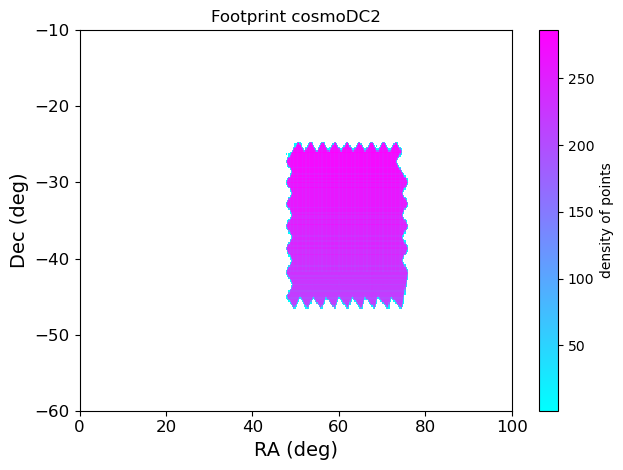

In [19]:
#Area = 441.41

ra = dc2['ra']
ra[ra >180.0] -= 360
dec = dc2['dec']
plt.hist2d(ra, dec, bins=100, weights=None, cmin=0.5, cmax=None, cmap='cool')
plt.xlabel("RA (deg)", fontsize=14)
plt.ylabel("Dec (deg)", fontsize=14)
plt.colorbar(label="density of points")
ylims=[-60, -10]
plt.ylim(ylims)
xlims=[0, 100]
plt.xlim(xlims)
#plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Footprint cosmoDC2', fontsize=12)
plt.tight_layout()

#### N(z)

In [ ]:
plt.hist(dc2['z_best'], bins='auto', ec="cornflowerblue", fc="cornflowerblue")
plt.xlabel("z")
plt.ylabel("Counts")
plt.title("Redshift Distribution")
plt.grid(True)
plt.tight_layout()

#### Mags dis

In [ ]:
bands = ['g', 'r', 'i', 'z', 'y']

for i, band in enumerate(bands):
    plt.figure()
    plt.hist(dc2[f'mag_{band}'], histtype='bar', bins='auto', ec="cornflowerblue")
    plt.xlabel("mag "+band)
    plt.ylabel("Counts")
    plt.xlim(10, 40)
    plt.yscale('log')
    plt.grid(True)
    plt.tight_layout()

#### Mag x z

In [ ]:
for i, band in enumerate(bands):
    pl.figure(figsize=[10,4])
    pl.subplot(121) 
    mag = np.array(dc2[f'mag_{band}'])
    z = np.array(dc2['z_best'])
    mask = (mag>14)&(mag<32)&(z<=2)
    pl.hexbin(z[mask], mag[mask], None,  mincnt=1, cmap='viridis', gridsize=[200,100], bins='log')
    cbar = pl.colorbar()
    pl.xlabel("mag "+band)
    pl.ylabel("redshift")
    pl.grid(True)
    pl.tight_layout()